<h3> Geopandas, Seaborn and NetworkX </h3>
<h5> Auxiliary packages for vizualisation </h5>

In this section we provide examples of using Geopandas, Seaborn and NetworkX.

Geopandas: https://geopandas.org

Seaborn: https://seaborn.pydata.org

NetworkX: https://networkx.org 

If you'd like to run the examples you will need to create a new environemnt and install the two libraries. Instructions are provided in Canvas (Modules > Week 2 > Instructions Lab 2 - GeoPandas + Seaborn)

<h1>Geopandas</h1>

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Here we will use Geopandas to plot some of the metrics in the 2022 Happiness Report.

Please follow https://geopandas.org/en/stable/getting_started.html for instructions on how to install GeoPandas.

One option to install geopandas is to run <code>!pip install geopandas</code> in a separate cell.

In [3]:
import geopandas as gpd
import pandas as pd
import pyproj

print(pyproj.__version__)
print(gpd.__version__)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

3.4.0
0.11.1


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

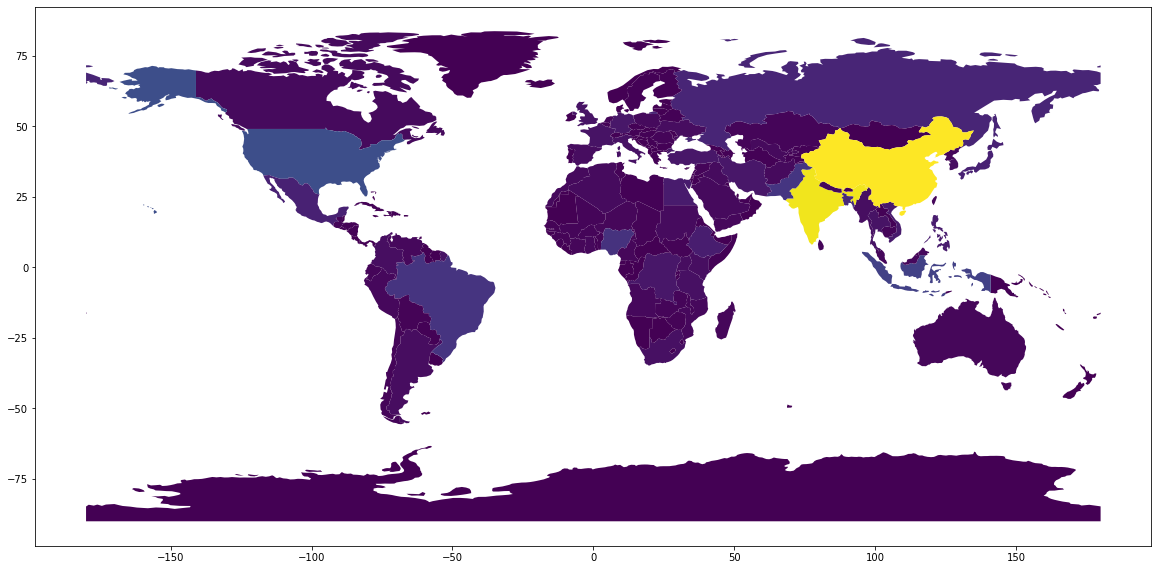

In [4]:
world.plot("pop_est", figsize=(20,20))

In [6]:
# Create a (Geo) Data Frame based on imported data
happinessdataframe = pd.read_excel('DataForTable2.1.xls', index_col=[0,1]) 
happinessdataframe2021 = happinessdataframe.loc(axis=0)[:,2021]
world_happiness_final = world.merge(happinessdataframe2021, how="left", left_on=['name'], right_on=['Country name'])
world_happiness_final.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.680568,7.889876,0.618984,59.400002,0.821773,0.113014,0.546387,0.648245,0.246362,0.891391
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",6.939435,10.770748,0.926076,71.400002,0.898229,0.193241,0.383990,0.762827,0.276233,0.610411
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

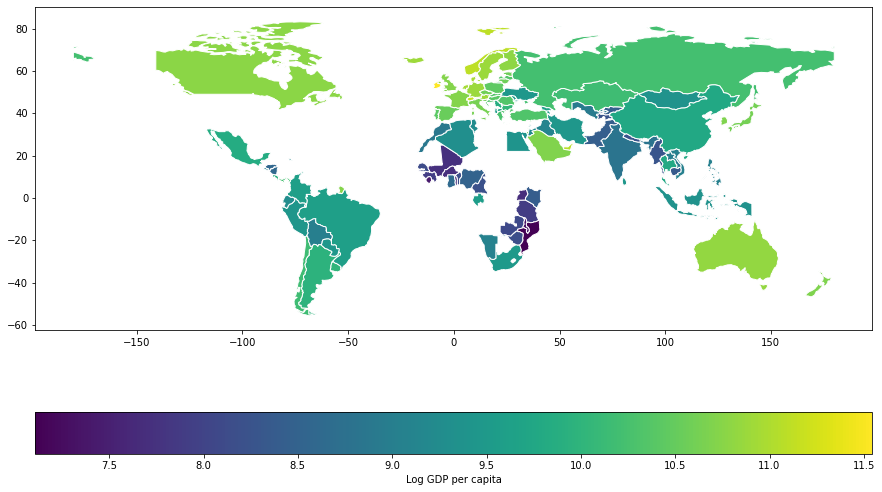

In [7]:
import matplotlib.pyplot as plt

world_happiness_final.plot("Log GDP per capita", 
                           figsize=(15,10),
                           legend=True,
                           
                           edgecolor="white",
                           legend_kwds={"label":"Log GDP per capita", "orientation":"horizontal"})

# Why are some countries not showing up? e.g., USA
# Hope you start realizing the importance of data cleaning and pre-processing

<h1>Seaborn</h1>

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Essentially, it allows you to easily apply pre-defined themes that make your plots look nicer. 

In [8]:
import seaborn as sns

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.arange(0,10,0.1)             # create some data
y = np.cos(np.arange(0,10,0.1))     # create some data

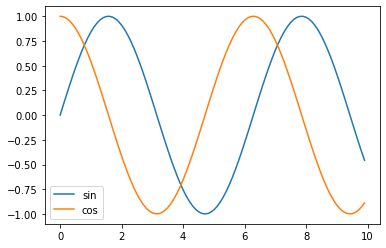

In [10]:
fig, ax = plt.subplots()   # create a figure and a set of subplots

ax.plot(x, np.sin(x))   # plot scatter plot in the corresponding Axes (ax)
ax.plot(x, np.cos(x))   # plot scatter plot in the same Axes (ax)

plt.legend(['sin','cos'])  # add a legend
plt.show()                 # display all open figures

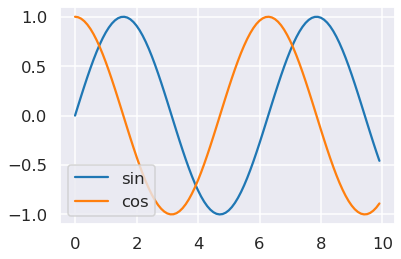

In [12]:
sns.set_style("darkgrid")
sns.set_context("talk")

fig, ax = plt.subplots()   # create a figure and a set of subplots

ax.plot(x, np.sin(x))   # plot scatter plot in the corresponding Axes (ax)
ax.plot(x, np.cos(x))   # plot scatter plot in the same Axes (ax)

plt.legend(['sin','cos'])  # add a legend
plt.show()                 # display all open figures

In [13]:
vals1 = np.random.standard_normal(1000)
vals2 = np.random.standard_normal(1000)

df = pd.DataFrame({'one' : vals1, 'two' : vals2, 'sum_positive' : vals1+vals2 > 0})

In [14]:
sns.set_style("white")
sns.set_context("paper")

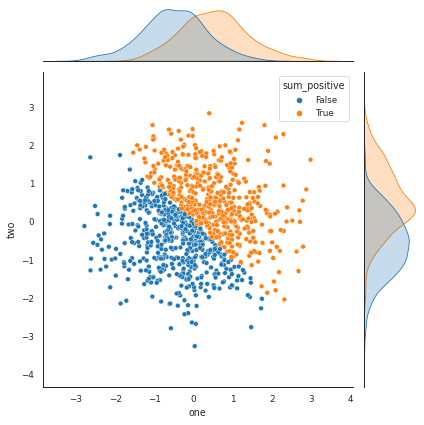

In [15]:
sns.jointplot(data=df, x='one', y='two', hue='sum_positive')

In [16]:
sns.reset_orig()

<h1>NetworkX</h1>

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In Week 4 we will use NetworkX to calculate some network metrics. For now we will use it to vizualise trade networks between countries.

We will use the BACI world trade dataset you can find in http://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=37. BACI provides data on bilateral trade flows for 200 countries at the product level (5000 products). This is also an example of dataset you can use in Assignment 1. A .zip file with the same data is available in Canvas (Modules > Week 2).

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Import trade data (check Readme.txt to understand format)
tradeDataFrame = pd.read_csv('BACI_HS17_V202201/BACI_HS17_Y2020_V202201.csv')

# Import country codes
countryCodes = pd.read_csv("BACI_HS17_V202201/country_codes_V202201.csv", encoding='iso-8859-1')

Let us first inspect the dataset to get an intuition for the data format...

In [18]:
tradeDataFrame.head()

,t,i,j,k,v,q
0,2020,4,31,251512,27.820,169.800
1,2020,4,32,391000,0.045,0.009
2,2020,4,32,401031,0.164,NA
3,2020,4,32,610120,0.012,0.003
4,2020,4,36,71120,0.727,0.308


In [19]:
countryCodes.head()

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


Some data pre-processing: turn NA into NaN

In [20]:
tradeDataFrame['q'] = pd.to_numeric(tradeDataFrame['q'], errors='coerce')
tradeDataFrame

,t,i,j,k,v,q
0,2020,4,31,251512,27.820,169.800
1,2020,4,32,391000,0.045,0.009
2,2020,4,32,401031,0.164,NaN
3,2020,4,32,610120,0.012,0.003
4,2020,4,36,71120,0.727,0.308
...,...,...,...,...,...,...
10473489,2020,894,858,854430,0.066,0.002
10473490,2020,894,858,870829,1.003,0.045
10473491,2020,894,858,870840,0.031,0.001
10473492,2020,894,858,870893,0.366,0.016


Select Fish products (check the file product_codes (*product_codes_HS17_.csv*) for extra info)

In [21]:
tradeDataFrameFood = tradeDataFrame[(tradeDataFrame['k'] > 0) & (tradeDataFrame['k'] < 100000)]
tradeDataFrameFood

,t,i,j,k,v,q
4,2020,4,36,71120,0.727,0.308
5,2020,4,36,71290,0.669,0.500
6,2020,4,36,80211,2.404,0.710
7,2020,4,36,80420,1.359,1.331
8,2020,4,36,80620,531.893,326.501
...,...,...,...,...,...,...
10473294,2020,894,842,40900,39.291,18.355
10473295,2020,894,842,70810,8.000,0.720
10473296,2020,894,842,71290,0.030,0.020
10473297,2020,894,842,90111,1988.273,533.899


Create an adjacency matrix, where rows are exporters and columns are importers

Note that an adjancency matrix is a matrix that represents a network: Each row/column represents a node (i.e., a node) and the corresponding entries represnet the connection (in this case, flow of products) between the two nodes.

In [22]:
adjMatrix = tradeDataFrameFood.pivot_table('q', index='i', columns='j', aggfunc='sum')

# Some extra pre-processing: NaA will be 0
adjMatrix = adjMatrix.fillna(0)
adjMatrix

j,4,8,12,16,20,24,28,31,32,36,...,834,842,854,858,860,862,876,882,887,894
i,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,396.453,...,0.000,981.490,0.0,0.0,558.987,0.0,0.0,0.0,0.0,0.0
8,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,2.5,24.884,...,0.000,753.517,0.0,0.1,0.000,0.0,0.0,0.0,0.0,0.0
12,0.0,5.34,0.0,0.0,0.0,0.000,0.0,757.796,39.6,44.890,...,0.000,3583.668,0.0,0.0,33.360,0.0,0.0,0.0,0.0,0.0
16,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,62.486,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
20,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,31.296,...,0.000,8243.066,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
876,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
882,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.0,680.471,...,0.000,284.104,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


In [23]:
# get dictionary with country labels (useful for labels)
labels = countryCodes['iso_3digit_alpha']
labels.index=countryCodes['country_code']
dictLabels = labels.to_dict()
dictLabels = dict((k,labels[k]) for k in adjMatrix.index)

A first attempt to create a graph and visualize it:

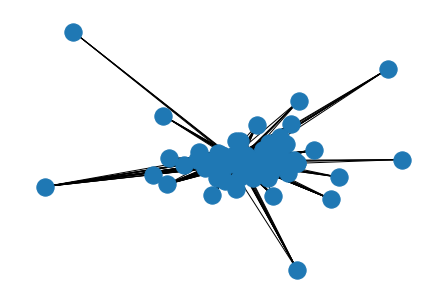

In [24]:
G = nx.Graph(adjMatrix)
nx.draw(G)

As you can see above, that is not the most effect visualization... We can try something different, explicitelly using the layout functions offered by NetworkX. We'll use spring_layout (implementing the Fruchterman-Reingold force-directed algorithm, also discussed in Lecture 3). More details here: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

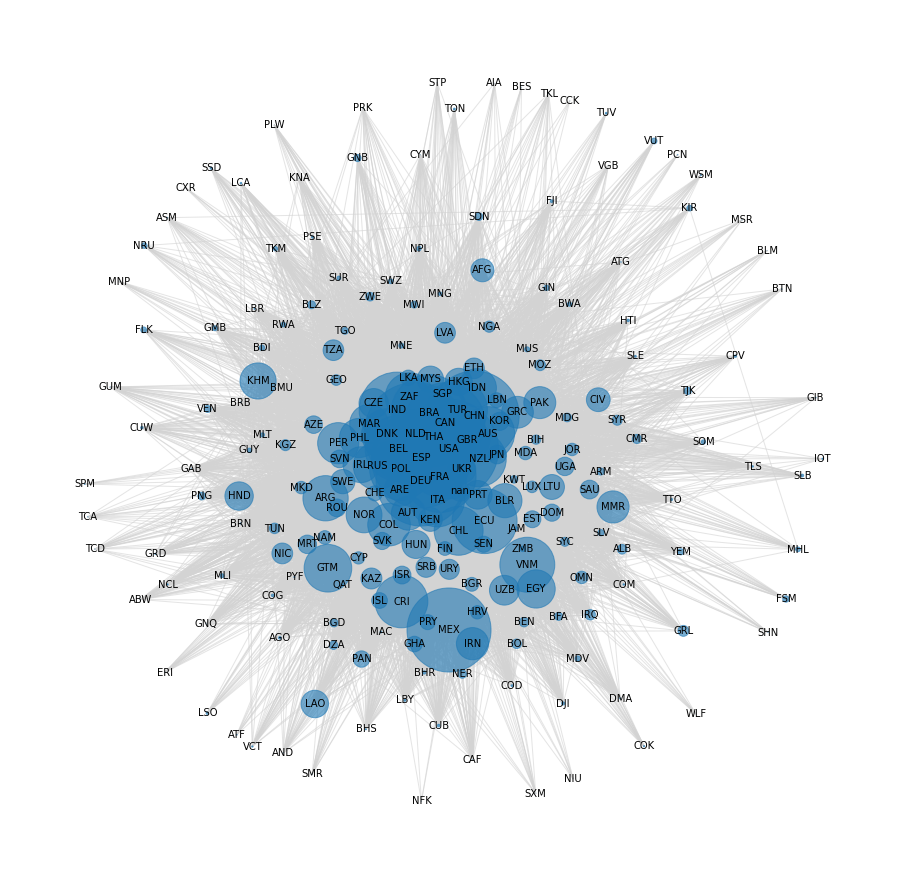

In [25]:
#create a larger figure
plt.figure(figsize=(16, 16))

#place nodes according to the force-directed algorithm
pos = nx.spring_layout(G, k=25, iterations=1000, weight=2, scale=10)

#node size proportional to total export volume
exportQuantity = adjMatrix.sum(axis="columns")
nodeSizes = exportQuantity[np.array(G.nodes)] * 0.0005 + 0.01

#labels as country code
labels = nx.draw_networkx_labels(G, pos, dictLabels, font_size=10, font_color="black")

#draw the graph
nx.draw(G, pos=pos, node_size = nodeSizes, edge_color="lightgray", alpha=0.6)

**Suggestions of variations to test, explore and think about:**
- Test different types of products (check *product_codes_HS17_V202201.csv* for different product codes); any observed difference?
- Test different years (more datasets in http://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=37)
- Different variations of graph layout by changing *k*, *scale* and *weight*
- Explore the tradeoffs between time and positions involved when increasing the parameter *iterations*
- To reflect: what is the meaning of countires in the core and periphery of this plot?
- To reflect: what can possibly represent groups of countries whose nodes are close together in the previous graph?
- Can you think about any criteria to color nodes?